# The Notebook will contain the following sections :

 - Exploratory Data analysis
 
 - Data Visualiztion
 
 - Data Preprocessing
 
 - ML Section

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [36]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Number of rows and columns in train and test files.

In [38]:
print(colored('Train data','magenta',attrs=['bold','underline']))
print(colored(f'Number of rows in training data is : {df.shape[0]}','blue'))
print(colored(f'Number of columns in training data is : {df.shape[1]}\n','blue'))
print(colored('Test data','magenta',attrs=['bold','underline']))
print(colored(f'Number of rows in test data is : {test.shape[0]}','blue'))
print(colored(f'Number of columns in test data is : {test.shape[1]}\n','blue'))

Train data
Number of rows in training data is : 8693
Number of columns in training data is : 14

Test data
Number of rows in test data is : 4277
Number of columns in test data is : 13



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Checking for missing values in the train and test datasets.

In [40]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [41]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Conclusion both the train and test dataset contain missing values and need to be handled properly.

# Data Visualization for individual features.(Univariate Analysis)

**HomePlanet**

In [42]:
sns.set()

Home Planet Count Train data
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

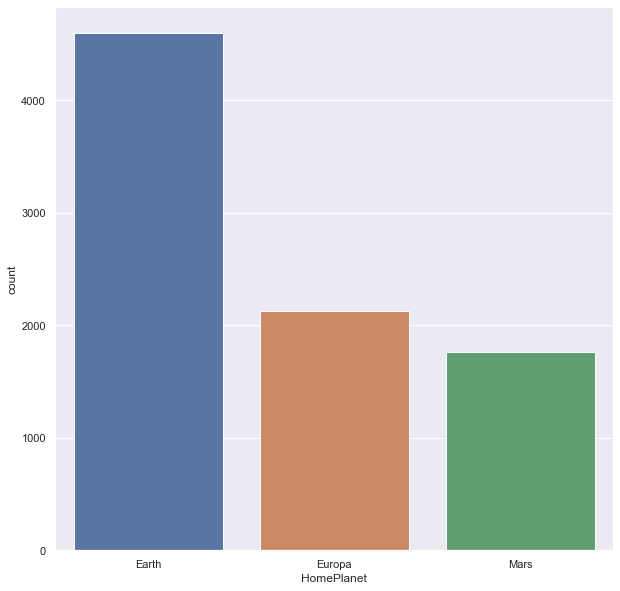

In [43]:
# For homeplanet in training
print(colored('Home Planet Count Train data','red', attrs=['bold','underline']))
print(colored(df['HomePlanet'].value_counts(),'blue',attrs=['bold']))
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(df['HomePlanet'],data=df,order= df['HomePlanet'].value_counts(ascending=False).index)

Home Planet Count Test data
Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

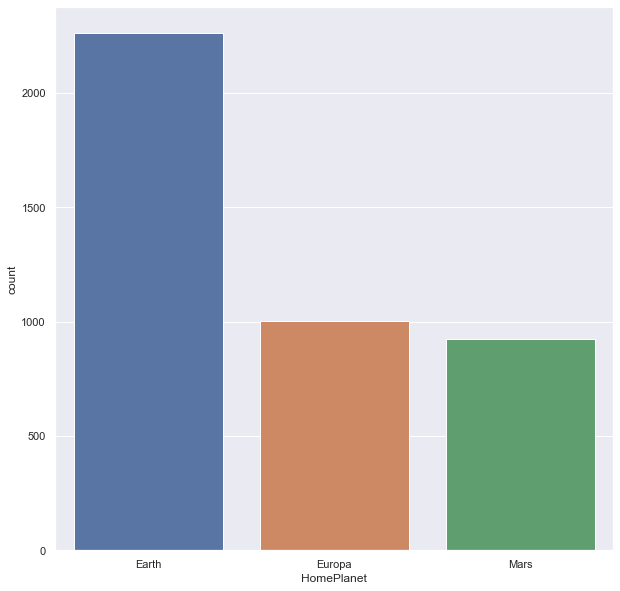

In [44]:
# For homeplanet in test
fig,ax = plt.subplots(figsize=(10,10))
print(colored('Home Planet Count Test data','red', attrs=['bold','underline']))
print(colored(test['HomePlanet'].value_counts(),'blue',attrs=['bold']))
sns.countplot(test['HomePlanet'],data=df,order= test['HomePlanet'].value_counts(ascending=False).index)

# Bivariate Analysis.

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
Mars        True            920
            False           839
Europa      False           727
dtype: int64


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

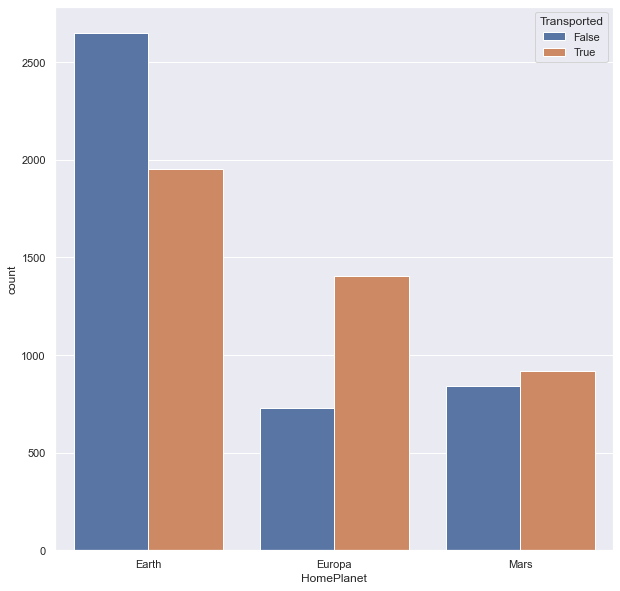

In [45]:
# Home planet vs Transported column train data.
fig,ax = plt.subplots(figsize=(10,10))
print(colored(df[['HomePlanet','Transported']].value_counts(),'green'))
sns.countplot('HomePlanet',hue='Transported',data=df,order=df['HomePlanet'].value_counts(ascending=False).index, ax=ax)

Europa and Mars seems to have a higher chance of a passenger being transported.

Earth seems to have a lower chances of being transported .

**CryoSleep**

People in Cryo Sleep Count Train data
False    5439
True     3037
Name: CryoSleep, dtype: int64


[Text(0.5, 1.0, 'Cryo Sleep count on train data')]

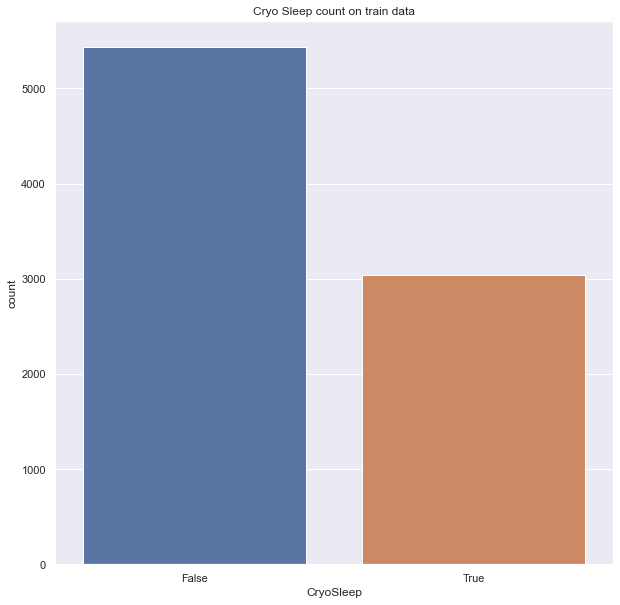

In [46]:
# Cryosleep count
print(colored('People in Cryo Sleep Count Train data','red', attrs=['bold','underline']))
print(colored(df['CryoSleep'].value_counts(),'cyan',attrs=['bold']))
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot('CryoSleep',data=df).set(title='Cryo Sleep count on train data')

People in Cryo Sleep Count Test data
False    2640
True     1544
Name: CryoSleep, dtype: int64


[Text(0.5, 1.0, 'Cryo Sleep count on test data')]

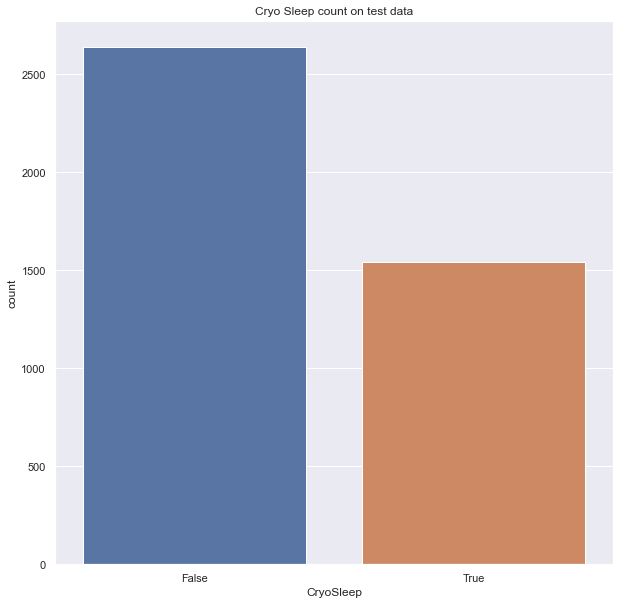

In [47]:
print(colored('People in Cryo Sleep Count Test data','red', attrs=['bold','underline']))
print(colored(test['CryoSleep'].value_counts(),'cyan',attrs=['bold']))
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot('CryoSleep',data=test).set(title='Cryo Sleep count on test data')

# Bivariate Analysis.[CryoSleep vs Transported]

CryoSleep  Transported
False      False          3650
True       True           2483
False      True           1789
True       False           554
dtype: int64


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

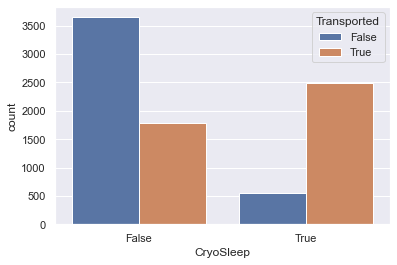

In [48]:
print(colored(df[['CryoSleep','Transported']].value_counts(),'green'))
sns.countplot('CryoSleep',hue='Transported',data=df)

Based on visualization we can see more people in cryosleep were transported so we can say they ar positively correlated.

In [49]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

**Destination**

People's Chosen Destination Count Train data
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


[Text(0.5, 1.0, 'Destiantion count on train data')]

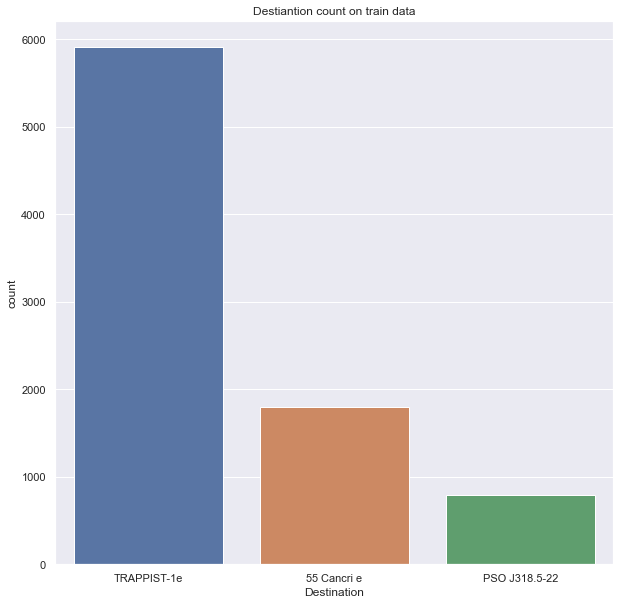

In [50]:
print(colored("People's Chosen Destination Count Train data",'red', attrs=['bold','underline']))
print(colored(df['Destination'].value_counts(),'cyan',attrs=['bold']))
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot('Destination',data=df,order=df['Destination'].value_counts(ascending=False).index).set(title='Destiantion count on train data')

People's Chosen Destination Count Test data
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64


[Text(0.5, 1.0, 'Destiantion count on test data')]

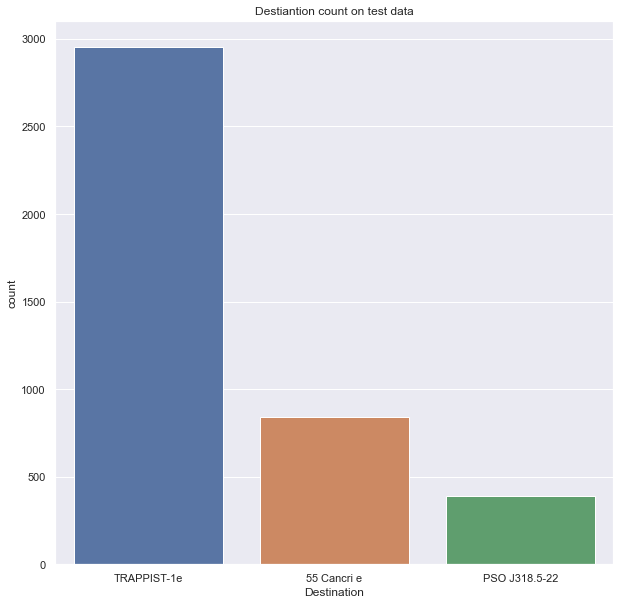

In [51]:
print(colored("People's Chosen Destination Count Test data",'red', attrs=['bold','underline']))
print(colored(test['Destination'].value_counts(),'cyan',attrs=['bold']))
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot('Destination',data=test,order=test['Destination'].value_counts(ascending=False).index).set(title='Destiantion count on test data')

# Bivariate Analysis training. [Destination vs Transported]

Destination    Transported
TRAPPIST-1e    False          3128
               True           2787
55 Cancri e    True           1098
               False           702
PSO J318.5-22  True            401
               False           395
dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

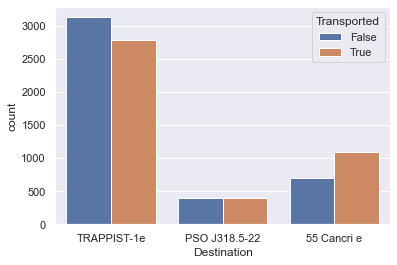

In [52]:
print(colored(df[['Destination','Transported']].value_counts(),'green',attrs=['bold']))
sns.countplot('Destination',hue='Transported',data=df)

Based on the graph we can see that Trappist-1e shows negative correlation with transported where as the other two planets Pso & 55 Cancri shows positive correlation with transported where cancri ahs the strongest relation.

**AGE**

<AxesSubplot:xlabel='Age', ylabel='Count'>

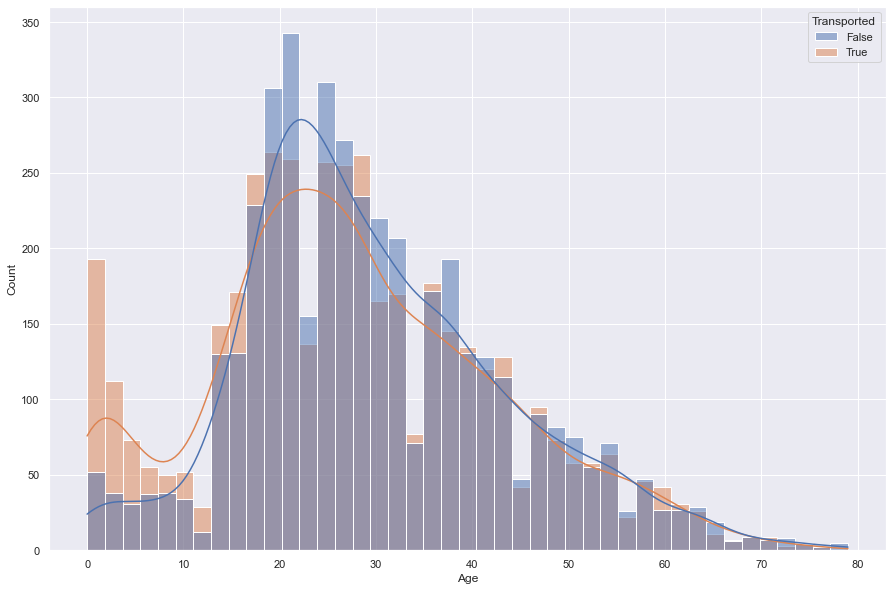

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(x='Age',hue='Transported',data=df,kde=True)

# Bivariate Analysis.[Age vs Transported]

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

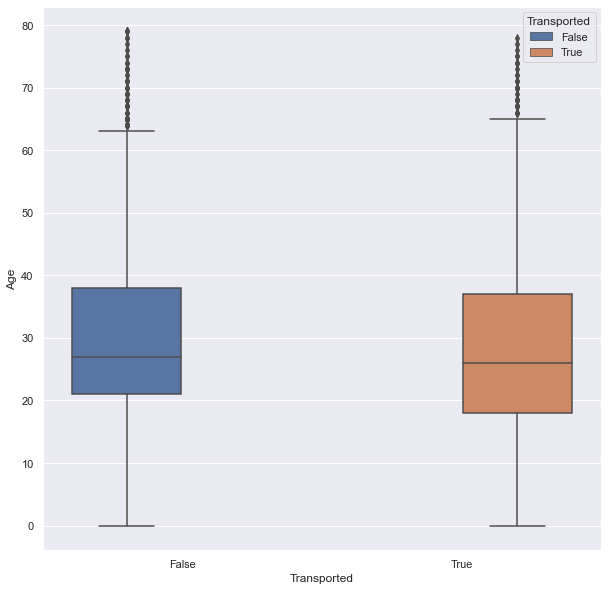

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot('Transported','Age',hue='Transported',data=df,ax=ax)
df['Age'].describe()

In [55]:
# Age distribution of prople who were succesfully transported
Transport_1 = df[df['Transported']==True]['Age']
print(colored('Age distribution of people who were succesfully transported','grey',attrs=['bold']))
print(colored(Transport_1.describe(),'magenta',attrs=['bold']))

Age distribution of people who were succesfully transported
count    4288.000000
mean       27.748834
std        15.151705
min         0.000000
25%        18.000000
50%        26.000000
75%        37.000000
max        78.000000
Name: Age, dtype: float64


In [56]:
Transport_0 = df[df['Transported']==False]['Age']
print(colored('Age distribution of people who were not succesfully transported','grey',attrs=['bold']))
print(colored(Transport_0.describe(),'magenta',attrs=['bold']))

Age distribution of people who were not succesfully transported
count    4226.000000
mean       29.922858
std        13.699262
min         0.000000
25%        21.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64


Based on the above info we can see that younger people have a higher chance of survival.

**VIP**

VIP Statstics
VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
dtype: int64


<AxesSubplot:xlabel='VIP', ylabel='count'>

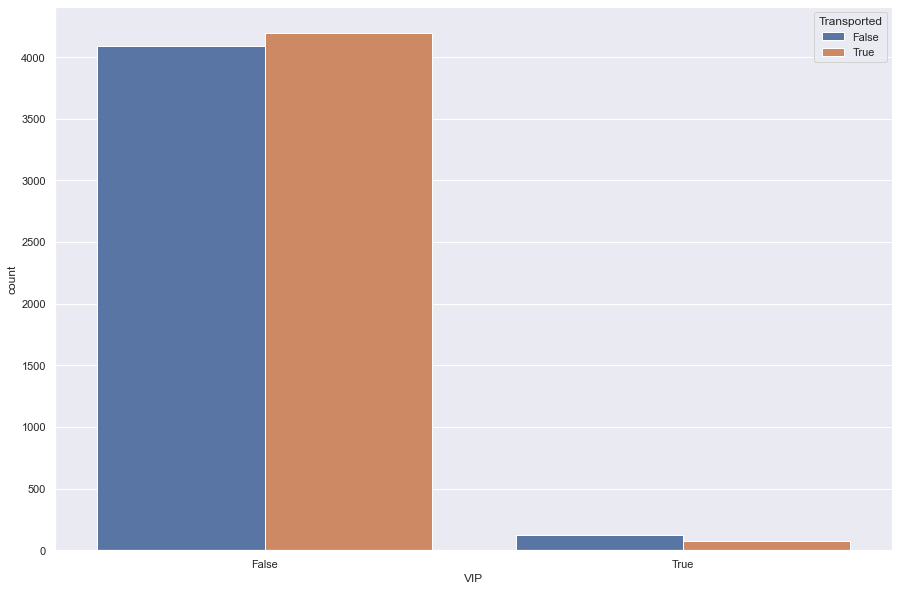

In [57]:
print(colored('VIP Statstics','blue',attrs=['bold','underline']))
print(colored(df[['VIP','Transported']].value_counts(),'grey',attrs=['bold']))
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot('VIP',hue='Transported',data=df,ax=ax)

In [58]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**RoomService FoodCourt ShoppingMall Spa VRDeck**

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

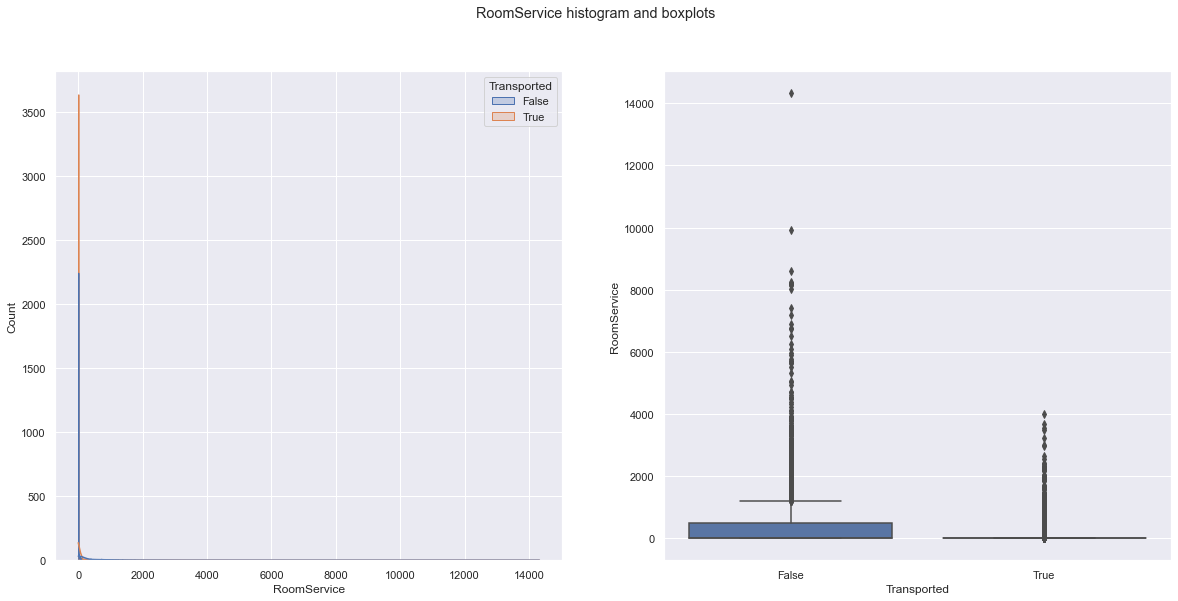

In [59]:
# Boxplot and histogram for each features
fig, ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle('RoomService histogram and boxplots')
# ax[0] denotes 1st row 1st column and ax[2] denotes 1nd row 2nd column from subplots 
sns.histplot(x='RoomService',hue='Transported',data=df,kde=True,ax=ax[0],element='step')
sns.boxplot('Transported','RoomService',data=df,ax=ax[1])

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

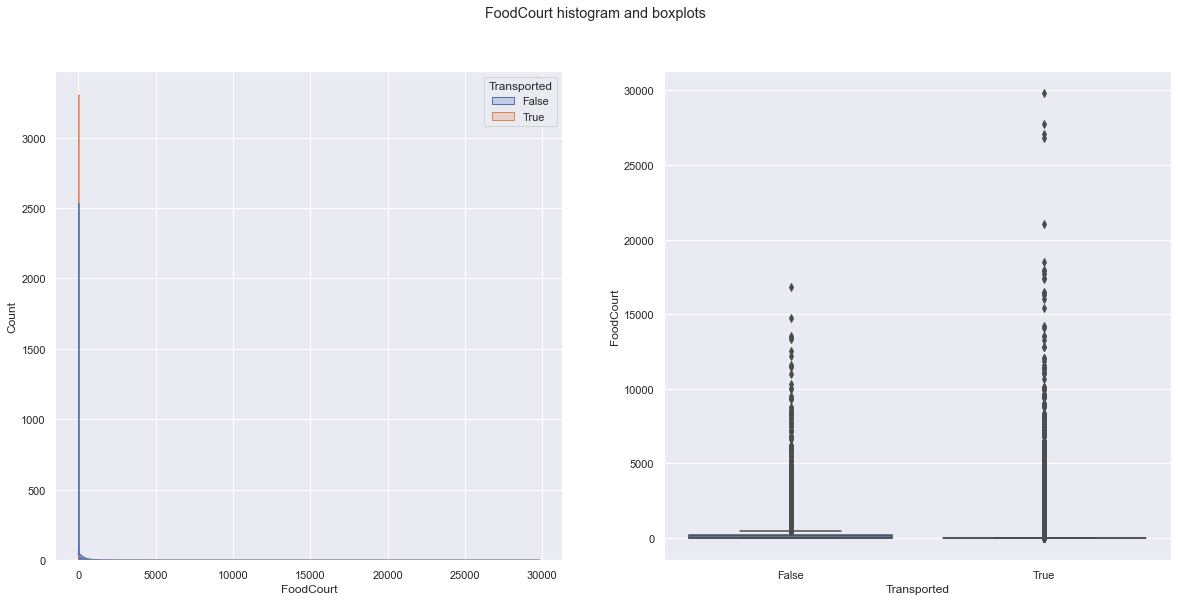

In [60]:
fig, ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle('FoodCourt histogram and boxplots')
sns.histplot(x='FoodCourt',hue='Transported',data=df,kde=True,ax=ax[0],element='step')
sns.boxplot('Transported','FoodCourt',data=df,ax=ax[1])

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

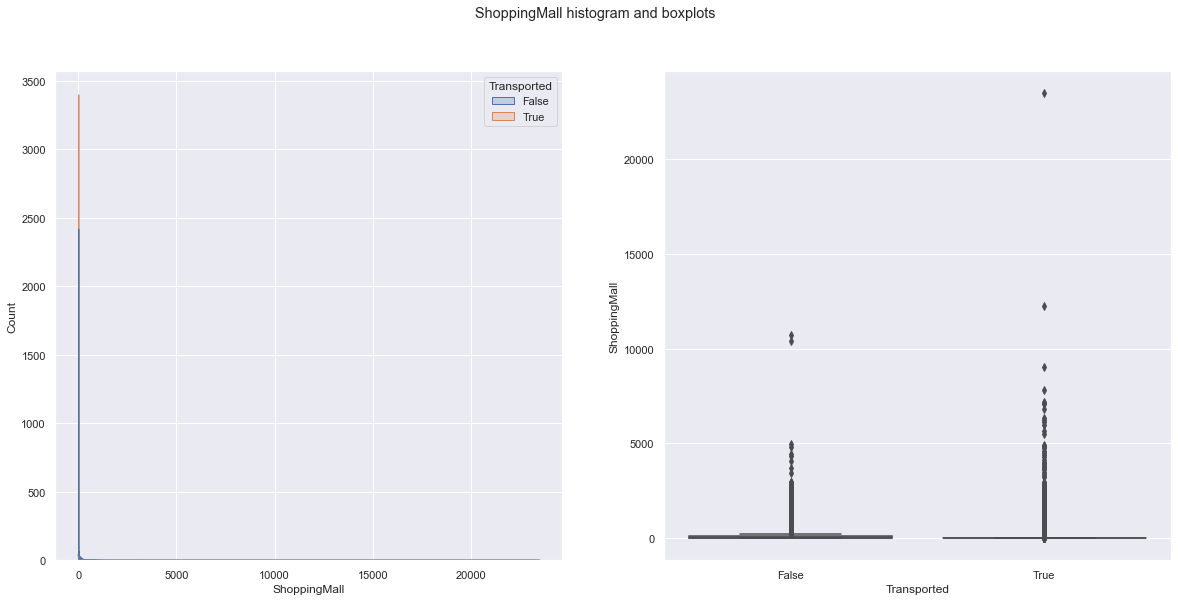

In [61]:
fig, ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle('ShoppingMall histogram and boxplots')
sns.histplot(x='ShoppingMall',hue='Transported',data=df,kde=True,ax=ax[0],element='step')
sns.boxplot('Transported','ShoppingMall',data=df,ax=ax[1])

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

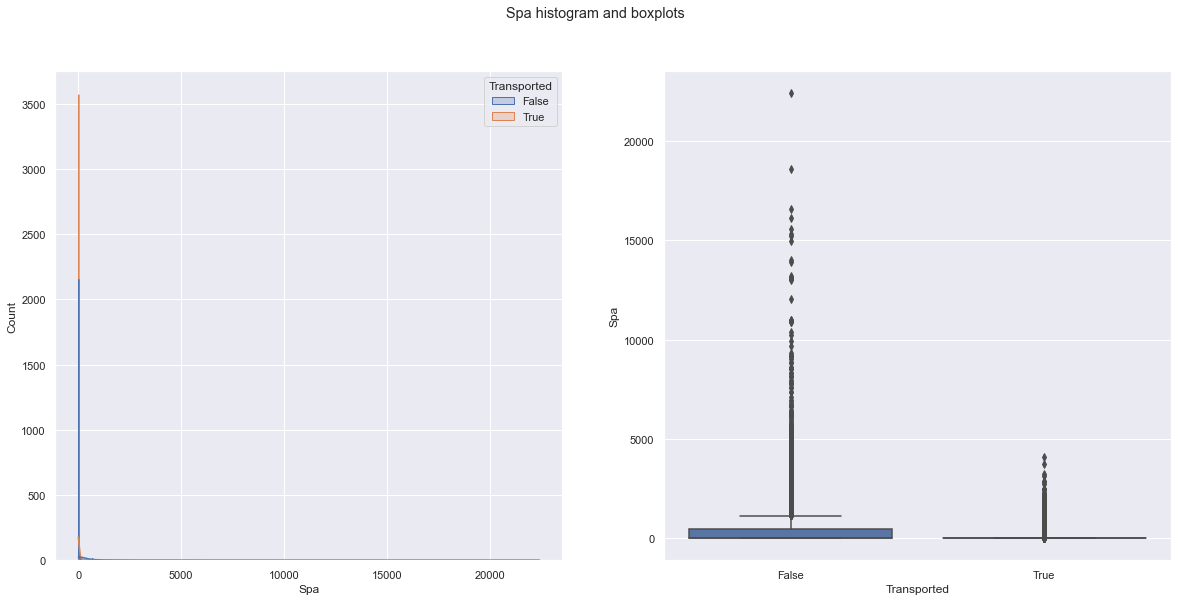

In [62]:
fig, ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle('Spa histogram and boxplots')
sns.histplot(x='Spa',hue='Transported',data=df,kde=True,ax=ax[0],element='step')
sns.boxplot('Transported','Spa',data=df,ax=ax[1])

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

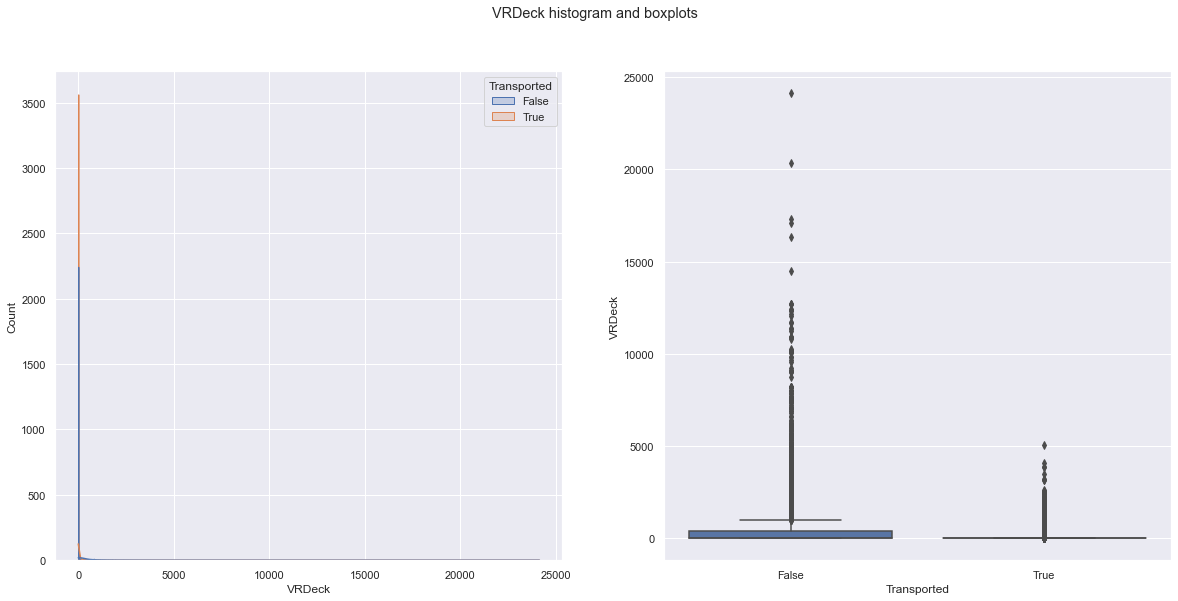

In [63]:
fig, ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle('VRDeck histogram and boxplots')
sns.histplot(x='VRDeck',hue='Transported',data=df,kde=True,ax=ax[0],element='step')
sns.boxplot('Transported','VRDeck',data=df,ax=ax[1])

**Age vs Money spend on amenities**

In [64]:
RoomService FoodCourt ShoppingMall Spa VRDeck

SyntaxError: invalid syntax (1717847130.py, line 1)

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

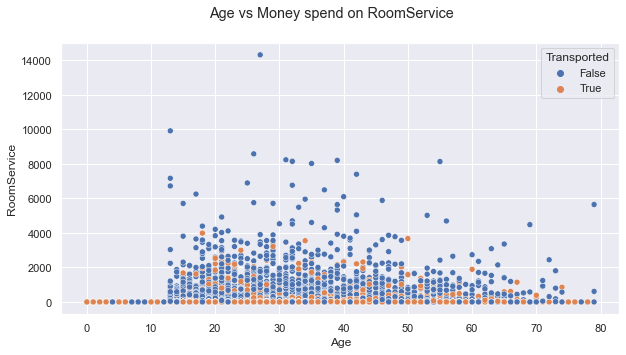

In [65]:
fig,ax=plt.subplots(figsize=(10,5))
plt.suptitle("Age vs Money spend on RoomService")
sns.scatterplot('Age','RoomService',hue='Transported',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

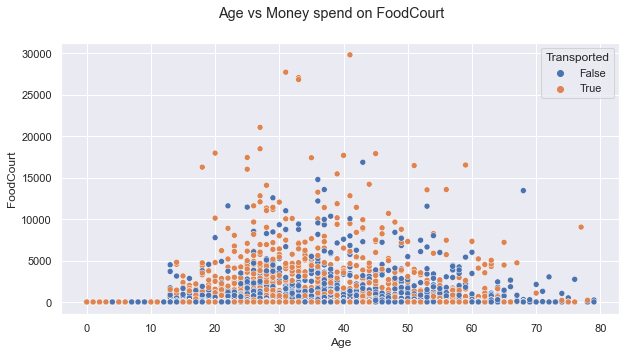

In [66]:
fig,ax=plt.subplots(figsize=(10,5))
plt.suptitle("Age vs Money spend on FoodCourt")
sns.scatterplot('Age','FoodCourt',hue='Transported',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='ShoppingMall'>

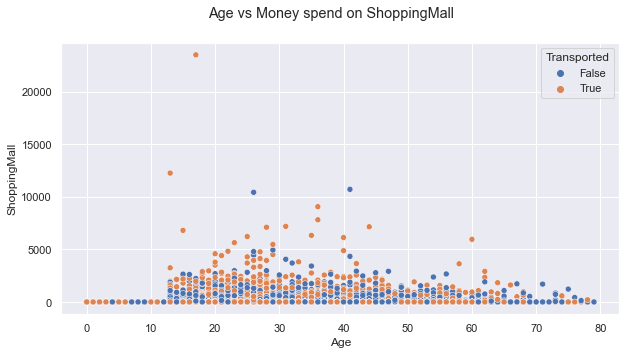

In [67]:
fig,ax=plt.subplots(figsize=(10,5))
plt.suptitle("Age vs Money spend on ShoppingMall")
sns.scatterplot('Age','ShoppingMall',hue='Transported',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Spa'>

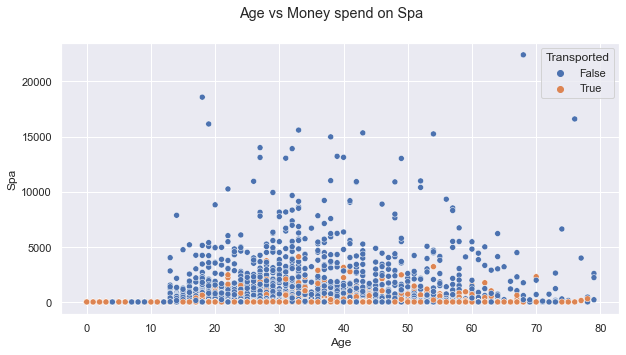

In [68]:
fig,ax=plt.subplots(figsize=(10,5))
plt.suptitle("Age vs Money spend on Spa")
sns.scatterplot('Age','Spa',hue='Transported',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

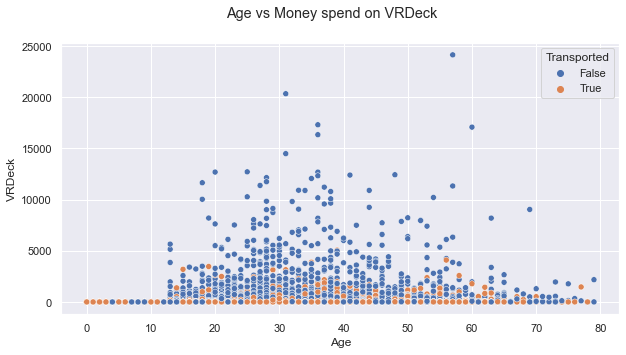

In [69]:
fig,ax=plt.subplots(figsize=(10,5))
plt.suptitle("Age vs Money spend on VRDeck")
sns.scatterplot('Age','VRDeck',hue='Transported',data=df,ax=ax)

**Creating a new column to add up all the values of the amenities such as RoomService FoodCourt ShoppingMall Spa VRDeck**

In [70]:
Amenities = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'] 


In [71]:
df['TotalSpend'] = df[Amenities].sum(axis=1)
test['TotalSpend'] = test[Amenities].sum(axis=1)

**Creating a correlation matrix to see if any features are correlated**

<AxesSubplot:>

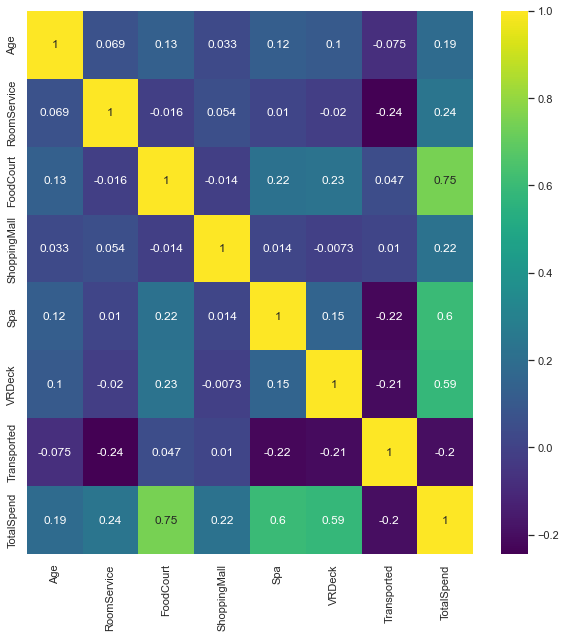

In [72]:
fig,ax=plt.subplots(figsize=(10,10))
corrmat = df.corr()
top_corr_features = corrmat.index
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='viridis',ax=ax)

From the above image we can see none of the features are highly correlated with any other features where correlation excedes 0.8 or 0.9.So no value needs to be dropped in the dataset.

In [73]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


# Data Pre-processing.

 We will remove some columns from both the datasets which we are not going to use .

In [74]:
# Scving passenger id for submission
Pass_ID = test['PassengerId']
df.drop(columns=['PassengerId','Cabin','Name'],axis=1,inplace=True)
test.drop(columns=['PassengerId','Cabin','Name'],axis=1,inplace=True)

In [75]:
print(colored("The null values in training data set are :",'red',attrs=['bold','underline']))
print(colored(df.isna().sum(),'grey',attrs=['bold']))
print(colored(f'Total missing values : {df.isna().sum().sum()}','blue',attrs=['bold','underline']))
print(colored("The null values in test data set are :",'red',attrs=['bold','underline']))
print(colored(test.isna().sum(),'grey',attrs=['bold']))
print(colored(f'Total missing values : {test.isna().sum().sum()}','blue',attrs=['bold','underline']))

The null values in training data set are :
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
TotalSpend        0
dtype: int64
Total missing values : 1925
The null values in test data set are :
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
TotalSpend        0
dtype: int64
Total missing values : 923


**Handling the missing values**

In [76]:
columns = test.columns

In [77]:
columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend'],
      dtype='object')

In [78]:
for col in columns:
    if col in ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',]:
        df[col].fillna(df[col].median(),inplace=True)
        test[col].fillna(test[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)
        test[col].fillna(test[col].mode()[0],inplace=True)
        
        

In [79]:
print(colored('Null Values after : ','green',attrs=['bold','underline']))
print(colored(f'For training data : {df.isna().sum().sum()}','grey',attrs=['bold']))
print(colored(f'For test data : {test.isna().sum().sum()}','grey',attrs=['bold']))

Null Values after : 
For training data : 0
For test data : 0


**Encoding labels and Scaling the data**

 - Objects will be LabelEncoded
 - Bools will be converted to int
 - Floats will be scaled usinf MinMaxScaler

In [80]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [81]:
for col in columns:
    if df[col].dtype == 'O':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        test[col] = encoder.fit_transform(test[col])
        
    elif df[col].dtype == 'bool':
        df[col] = df[col].astype('int')
        test[col] = test[col].astype('int')

# Turning the transported column into int
df['Transported'] = df['Transported'].astype('int')

In [82]:
df['Age']

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [83]:
# Scaling Age column
scaler=MinMaxScaler()
# Dimension did not match so create a varianlt with 2 dimension and then pass it to df after wards
scale_col = ['Age',]
df['Age'] = scaler.fit_transform(df[scale_col])
test['Age'] = scaler.fit_transform(test[scale_col])

In [84]:
X, Y = df.drop(columns=['Transported'],axis=1),df[['Transported']]

In [88]:
Y

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


**Train Test Split**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state=8,stratify=Y)

In [96]:
print(colored(f'Rows and column in X_train : {X_train.shape}','red',attrs=['bold']))
print(colored(f'Rows and column in Y_train : {Y_train.shape}','red',attrs=['bold']))
print(colored(f'Rows and column in X_val : {X_val.shape}','cyan',attrs=['bold']))
print(colored(f'Rows and column in Y_val : {Y_val.shape}','cyan',attrs=['bold']))

Rows and column in X_train : (6954, 11)
Rows and column in Y_train : (6954, 1)
Rows and column in X_val : (1739, 11)
Rows and column in Y_val : (1739, 1)


# Machine Learning Models.

- Logistic Regression
- Support Vector Classifier
- Stochastic Gradient Descent Classifier
- Random Forest Classifier
- XGBoost Classifier
- AdaBoost Classifier



**Now we will use the above models to find out the most accurate model.**

In [138]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [99]:
# Dictionary to store model accuracy
model_dict = {}

In [101]:
# For checking the accuracy of each model
from sklearn.metrics import accuracy_score

- Logistic Regression

In [115]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_log_reg = accuracy_score(Y_val,Y_pred)
model_dict['Logistic Regression'] = acc_log_reg
print(colored(acc_log_reg,'magenta',attrs=['bold']))

0.7941345600920069


- Supported Vector Machine

In [116]:
classifier = SVC(random_state=2)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_supp_vec = accuracy_score(Y_val,Y_pred)
model_dict['Supported Vector Machine'] = acc_supp_vec
print(colored(acc_supp_vec,'magenta',attrs=['bold']))

0.7837837837837838


- Stochastic Gradient Descent

In [123]:
classifier = SGDClassifier(random_state=10)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_sto_gra = accuracy_score(Y_val,Y_pred)
model_dict['Stochastic Gradient Descent'] = acc_sto_gra
print(colored(acc_sto_gra,'magenta',attrs=['bold']))

0.772857964347326


- Random Forest Classifier

In [129]:
classifier = RandomForestClassifier(random_state=40)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_rand_for = accuracy_score(Y_val,Y_pred)
model_dict['Random Forest Classifier'] = acc_rand_for
print(colored(acc_rand_for,'magenta',attrs=['bold']))

0.7780333525014376


In [136]:
classifier = XGBClassifier(random_state=20,eval_metric='rmse')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_XG_boo = accuracy_score(Y_val,Y_pred)
model_dict['Extreme Gradient Boost'] = acc_XG_boo
print(colored(acc_XG_boo,'magenta',attrs=['bold']))

0.7929844738355377


- Adaptive Boosting(ADaBoost)

In [139]:
dtc = DecisionTreeClassifier(random_state=40)
classifier = AdaBoostClassifier(dtc,random_state=42)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_val)
acc_Ada_boo = accuracy_score(Y_val,Y_pred)
model_dict['Adaptive Boosting'] = acc_Ada_boo
print(colored(acc_Ada_boo,'magenta',attrs=['bold']))

0.7602070155261644


In [145]:
model_dict

{'Logistic Regression': 0.7941345600920069,
 'Supported Vector Machine': 0.7837837837837838,
 'Stochastic Gradient Descent': 0.772857964347326,
 'Random Forest Classifier': 0.7780333525014376,
 'Extreme Gradient Boost': 0.7929844738355377,
 'Adaptive Boosting': 0.7602070155261644}

In [163]:
model_df = pd.DataFrame(model_dict,index=['Accuracy']).T

These are the respective model with their accuracies.

In [164]:
model_df

,Accuracy
Logistic Regression,0.794135
Supported Vector Machine,0.783784
Stochastic Gradient Descent,0.772858
Random Forest Classifier,0.778033
Extreme Gradient Boost,0.792984
Adaptive Boosting,0.760207


**So the models with the highest accuracies are Logistic Regression,SVM,XGB**

Now we will perform Grid Search on these 3 models.

In [190]:
from sklearn.model_selection import GridSearchCV

In [193]:
list_of_models = [LogisticRegression(max_iter=1000),SVC(max_iter=1000),XGBClassifier(eval_metric='rmse')]
model_hyperparameters = {
    'log_reg': {
        'C' : [1,5,10,15,20]
    },
    'SVC' : {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,15,20]
    },
    'XG_Boost' : {
        'learning_rate': [0.1,0.125, 0.075],
        'n_estimators': [15, 50, 100],
        'max_depth': [3, 4, 5, 6]
    }
    
}

In [194]:
keys = list(model_hyperparameters.keys())
keys

['log_reg', 'SVC', 'XG_Boost']

In [199]:
global_result = []
# Function for model selection
def model_selection(model_list,hyperparameter_list):
    i=0
    for model in model_list:
        model_name = keys[i]
        params = model_hyperparameters[model_name]
        i+=1
        print(colored(model,'blue',attrs=['bold','underline']))
        print(colored(params,'magenta',attrs=['bold']))
        
        classifier = GridSearchCV(model,params,cv=5)
        classifier.fit(X,Y)
        
        global_result.append({
            'Model Used' : [model],
            'Highest Score' : [classifier.best_score_],
            'Best Parameters' : [classifier.best_params_]
        })
    
    print(colored(global_result,'red',attrs=['bold']))
    result_dataframe = pd.DataFrame(global_result,columns=['Model Used','Highest Score','Best Parameters'])
    return result_dataframe

In [200]:
model_selection(list_of_models,model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 15, 20]}
SVC(max_iter=1000)
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 15, 20]}
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='rmse', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
{'learning_rate': [0.1, 0.125, 0.075], 'n_estimators': [15, 50, 100], 'max_depth': [3, 4, 5, 6]}
[{'Model Used': [LogisticRegression(max_iter

,Model Used,Highest Score,Best Parameters
0,[LogisticRegression(max_iter=1000)],[0.7855758140433605],[{'C': 15}]
1,[SVC(max_iter=1000)],[0.6168031043064709],"[{'C': 20, 'kernel': 'linear'}]"
2,"[XGBClassifier(base_score=None, booster=None, ...",[0.7990361244872421],"[{'learning_rate': 0.125, 'max_depth': 6, 'n_e..."


**So we can see from the above Dataframe that XGBClassifier has the highest accuracy of all the model with its respective parameters**

In [220]:
classifier=XGBClassifier(learning_rate=0.125,n_estimators=50,eval_metric='rmse')

In [221]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,0,1,2,0.341772,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0.240506,0,0.0,9.0,0.0,2823.0,0.0,2832.0
2,1,1,0,0.392405,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,0.481013,0,0.0,6652.0,0.0,181.0,585.0,7418.0
4,0,0,2,0.253165,0,10.0,0.0,635.0,0.0,0.0,645.0


In [222]:
# have to call fit for some reason for XGBoost or it shows error.
classifier.fit(X_val,Y_val)
submission = classifier.predict(test)
data = {
    'PassengerId' : Pass_ID,
    'Transported' : np.asarray(submission).astype('bool')
}
submission_df = pd.DataFrame(data).reset_index()

submission_df.drop(columns=['index'],inplace=True)
submission_df.to_csv('submission.csv',index=False)